In [40]:
#Cargar librerias
import pathlib as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [8]:
DATASET_PATH = "..\data\Acelerometro"
dataset_directory = pl.Path(DATASET_PATH)
dataset_files = dataset_directory.glob("*.csv")
dfs = []
for file in dataset_files:
    dfs.append(pd.read_csv(file))
df = pd.concat(dfs, ignore_index=True)
df.head()

,timestamp,accX,accY,accZ,label
0,0,-0.4,2.2,8.4,bajar escaleras
1,16,0.0,0.6,9.6,bajar escaleras
2,32,-1.0,1.6,10.1,bajar escaleras
3,48,-1.0,1.9,9.9,bajar escaleras
4,64,-1.3,2.2,9.3,bajar escaleras


In [9]:
df.shape

(6250, 5)

In [59]:
categories = LabelEncoder().fit_transform(df['label'].unique())
df['label'] = LabelEncoder().fit_transform(df['label'])

In [60]:
X = df[['accX', 'accY', 'accZ']]
Y = df['label']

In [61]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [62]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
y_train= keras.utils.to_categorical(y_train)
y_test= keras.utils.to_categorical(y_test)
print(y_train)
print(y_test)

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y activación ReLU
    tf.keras.layers.Dense(64, activation='relu'),   # Capa oculta con 64 neuronas y activación ReLU
    tf.keras.layers.Dense(5, activation='softmax')  # Capa de salida con 10 neuronas (una por cada clase) y activación Softmax
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Precisión en el conjunto de prueba:', test_acc)

Epoch 1/10
137/137 [==============================] - 3s 10ms/step - loss: 1.1685 - accuracy: 0.5673 - val_loss: 0.9003 - val_accuracy: 0.6651
Epoch 2/10
137/137 [==============================] - 1s 5ms/step - loss: 0.8220 - accuracy: 0.7102 - val_loss: 0.7540 - val_accuracy: 0.7291
Epoch 3/10
137/137 [==============================] - 1s 4ms/step - loss: 0.7406 - accuracy: 0.7301 - val_loss: 0.7063 - val_accuracy: 0.7435
Epoch 4/10
137/137 [==============================] - 1s 4ms/step - loss: 0.7038 - accuracy: 0.7449 - val_loss: 0.6844 - val_accuracy: 0.7472
Epoch 5/10
137/137 [==============================] - 1s 4ms/step - loss: 0.6869 - accuracy: 0.7520 - val_loss: 0.6735 - val_accuracy: 0.7493
Epoch 6/10
137/137 [==============================] - 1s 4ms/step - loss: 0.6731 - accuracy: 0.7513 - val_loss: 0.6676 - val_accuracy: 0.7531
Epoch 7/10
137/137 [==============================] - 1s 4ms/step - loss: 0.6631 - accuracy: 0.7499 - val_loss: 0.6533 - val_accuracy: 0.7589
Epoch

In [76]:
y_pred_rf = model.predict(X_test)

59/59 [==============================] - 0s 3ms/step
[[5.7227551e-03 1.2401388e-07 9.9175793e-01 1.2963467e-07 2.5190632e-03]
 [1.3879615e-04 1.5452837e-11 1.3972135e-01 2.7210815e-05 8.6011261e-01]
 [1.0035478e-03 2.4296247e-04 2.6646027e-01 7.8115545e-02 6.5417761e-01]
 ...
 [3.8583983e-02 9.1277951e-01 1.4290867e-02 1.9283872e-02 1.5061809e-02]
 [8.8357610e-01 1.5126305e-02 5.3124744e-02 4.6139245e-04 4.7711488e-02]
 [9.7113907e-01 1.6526075e-03 2.0937312e-02 1.0133851e-05 6.2608137e-03]]


In [78]:
y_predreport=np.argmax(y_pred_rf, axis=1)
y_tes=np.argmax(y_test, axis=1)
print(classification_report(y_tes, y_predreport))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       372
           1       0.74      0.79      0.76       373
           2       0.87      0.68      0.76       382
           3       0.75      0.83      0.79       380
           4       0.70      0.65      0.68       368

    accuracy                           0.75      1875
   macro avg       0.76      0.75      0.75      1875
weighted avg       0.76      0.75      0.75      1875



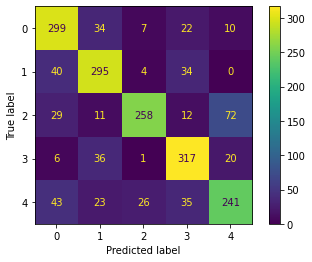

In [79]:
cm = confusion_matrix(y_tes, y_predreport)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()